# What is DataFrames?

https://dataframes.juliadata.org/stable/

DataFrames.jl provides a set of tools for working with tabular data in Julia. Its design and functionality are similar to those of `pandas` (in Python) and `data.frame`, `data.table` and `dplyr` (in R), making it a great general purpose data science tool.

`DataFrames.jl` plays a central role in the Julia Data ecosystem, and has tight integrations with a range of different libraries. `DataFrames.jl` isn't the only tool for working with tabular data in Julia – as noted below, there are some other great libraries for certain use-cases – but it provides great data wrangling functionality through a familiar interface.

To understand the toolchain in more detail, have a look at the tutorials in this manual. New users can start with the First Steps with `DataFrames.jl` section.

You may find the `DataFramesMeta.jl` package or one of the other convenience packages discussed in the Data manipulation frameworks section of this manual helpful when writing more advanced data transformations, especially if you do not have a significant programming experience. These packages provide convenience syntax similar to `dplyr` in R.

If you use metadata when working with `DataFrames.jl` you might find the `TableMetadataTools.jl` package useful. This package defines several convenience functions for performing typical metadata operations.

# Using DataFrames

https://dataframes.juliadata.org/stable/man/getting_started/

## Getting Started
Installation
The DataFrames package is available through the Julia package system and can be installed using the following commands:

`using Pkg`
`Pkg.add("DataFrames")`

Throughout the rest of this tutorial, we will assume that you have installed the DataFrames package and have already typed using DataFrames to bring all of the relevant variables into your current namespace.

In [8]:
using DataFrames

# First step

https://dataframes.juliadata.org/stable/man/basics/

In [9]:
# Construct an empty dataframe
DataFrame()

0×0 DataFrame

In [3]:
# define a dataframe column by column
df = DataFrame(A=1:3, B=5:7, fixed=1)

Row,A,B,fixed
,Int64,Int64,Int64
1,1,5,1
2,2,6,1
3,3,7,1


In [4]:
names(df)

3-element Vector{String}:
 "A"
 "B"
 "fixed"

In [5]:
typeof(df)

DataFrame

In [6]:
DataFrame("customer age" => [15, 20, 25],
                 "first name" => ["Rohit", "Rahul", "Akshat"])

Row,customer age,first name
,Int64,String
1,15,Rohit
2,20,Rahul
3,25,Akshat


In [7]:
dict = Dict("customer age" => [15, 20, 25],
                   "first name" => ["Rohit", "Rahul", "Akshat"])

Dict{String, Vector} with 2 entries:
  "first name"   => ["Rohit", "Rahul", "Akshat"]
  "customer age" => [15, 20, 25]

In [8]:
DataFrame(dict)

Row,customer age,first name
,Int64,String
1,15,Rohit
2,20,Rahul
3,25,Akshat


In [9]:
dict = Dict(:customer_age => [15, 20, 25],
                   :first_name => ["Rohit", "Rahul", "Akshat"])

Dict{Symbol, Vector} with 2 entries:
  :customer_age => [15, 20, 25]
  :first_name   => ["Rohit", "Rahul", "Akshat"]

In [10]:
DataFrame(dict)

Row,customer_age,first_name
,Int64,String
1,15,Rohit
2,20,Rahul
3,25,Akshat


Using Symbols, e.g. :customer_age rather than strings, e.g. "customer age" to denote column names is preferred as it is faster. However, as you can see in the example above if our column name contains a space it is not very convenient to pass it as a Symbol (you would have to write Symbol("customer age"), which is verbose) so using a string is more convenient.

It is also quite common to create a DataFrame from a NamedTuple of vectors or a vector of NamedTuples. Here are some examples of these operations:

In [ ]:
DataFrame((a=[1, 2], b=[3, 4]))

In [ ]:
DataFrame([(a=1, b=0), (a=2, b=0)])

In [ ]:
mat = [1 2 4 5; 15 58 69 41; 23 21 26 69]

In [ ]:
names = ["a", "b", "c", "d"]

In [ ]:
DataFrame(mat, names)

## Reading Data From CSV Files

Here we focus on one of the most common scenarios, where one has data stored on disk in the CSV format. 

The following lists two Julia lackages to read CSV files:

1. `CSV.jl` 


2. `CSVFiles.jl` (used with `FileIO.jl`)

## Using `CSV.jl`

In [1]:
using CSV

In [2]:
pwd()

"c:\\Users\\ZackO\\Desktop\\ParallelPrograming\\ParallelProgrammingClass\\ClassNoteBooks"

In [3]:
readdir()

17-element Vector{String}:
 "Array File IO.ipynb"
 "Arrays .ipynb"
 "Chapter 2 Calculator.ipynb"
 "Chapter 3 Control Flow.ipynb"
 "Chapter 4 Spreadsheet.ipynb"
 "Chapter 5 Working with text.ipynb"
 "Chapter 7 Understanding Types.ipynb"
 "Chapter 7_2 Colors and Images.ipynb"
 "Chapter14 Vector and Matrix.ipynb"
 "DataFrames.ipynb"
 "Functions.ipynb"
 "Mean Face.ipynb"
 "Primes.ipynb"
 "a2.bin"
 "a2.fld"
 "data1.fld"
 "test.fld"

In [4]:
cd("../CSV")

In [5]:
readdir()

7-element Vector{String}:
 "graph.csv"
 "graph_2.csv"
 "list_attr_celeba_2.csv"
 "person.csv"
 "sp500_companies.csv"
 "sp500_index.csv"
 "sp500_list_07_29_2022.csv"

### Read `person.csv` using `CSV.jl`

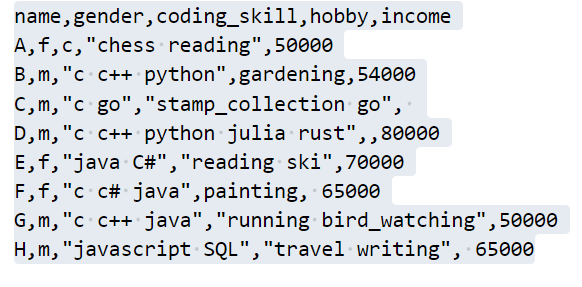

In [10]:
df = CSV.read("person.csv", DataFrame)

Row,name,gender,coding_skill,hobby,income
,String1,String1,String31,String31?,String7
1,A,f,c,chess reading,50000
2,B,m,c c++ python,gardening,54000
3,C,m,c go,stamp_collection go,
4,D,m,c c++ python julia rust,missing,80000
5,E,f,java C#,reading ski,70000
6,F,f,c c# java,painting,65000
7,G,m,c c++ java,running bird_watching,50000
8,H,m,javascript SQL,travel writing,65000


In [13]:
v = names(df);
v

5-element Vector{String}:
 "name"
 "gender"
 "coding_skill"
 "hobby"
 "income"

In [14]:
for i in 1:length(v)
    println(v[i])
end

name
gender
coding_skill
hobby
income


In [15]:
df[:,:income]

8-element Vector{String7}:
 "50000"
 "54000"
 " "
 "80000"
 "70000"
 " 65000"
 "50000"
 " 65000"

In [16]:
income = df[:,:income];

In [17]:
income[3] = "0"

"0"

In [18]:
income = [parse(Float32, i) for i in income]

8-element Vector{Float32}:
 50000.0
 54000.0
     0.0
 80000.0
 70000.0
 65000.0
 50000.0
 65000.0

In [19]:
h = df[:, :hobby]

8-element Vector{Union{Missing, String31}}:
 "chess reading"
 "gardening"
 "stamp_collection go"
 missing
 "reading ski"
 "painting"
 "running bird_watching"
 "travel writing"

In [20]:
h[4] = ""

""

In [21]:
h

8-element Vector{Union{Missing, String31}}:
 "chess reading"
 "gardening"
 "stamp_collection go"
 ""
 "reading ski"
 "painting"
 "running bird_watching"
 "travel writing"

# Using `CSVFiles.jl`

https://juliapackages.com/p/csvfiles

**Overview**

This package provides load and save support for CSV Files under the FileIO.jl package.

Usage
Load a CSV file
To read a CSV file into a DataFrame, use the following julia code:

`using FileIO, DataFrames`

`df = DataFrame(load("data.csv"))`

To read a gzipped CSV file into a DataFrame:

`df = DataFrame(load(File(format"CSV", "data.csv.gz")))`

The call to load returns a struct that is an `IterableTable.jl`, so it can be passed to any function that can handle iterable tables, i.e. all the sinks in `IterableTable.jl`. Here are some examples of materializing a CSV file into data structures that are not a `DataFrame`:

using CSVFiles, DataTables, IndexedTables, TimeSeries, Temporal, Gadfly

`#Load into a DataTable`

`dt = DataTable(load("data.csv"))`

`#Load into an IndexedTable`

`it = IndexedTable(load("data.csv"))`

`#Load into a TimeArray`

`ta = TimeArray(load("data.csv"))`

`#Load into a TS`

`ts = TS(load("data.csv"))`



In [22]:
using FileIO

In [ ]:
using CSVFiles

### Read `person.csv` using `FileIO.jl` (with `CSVFile` extension)

In [31]:
using Pkg;
Pkg.instantiate()
pwd()

it = load("./person.csv");

In [32]:
df2 = DataFrame(it)

Row,name,gender,coding_skill,hobby,income
,String,String,String,String,Int64?
1,A,f,c,chess reading,50000
2,B,m,c c++ python,gardening,54000
3,C,m,c go,stamp_collection go,missing
4,D,m,c c++ python julia rust,,80000
5,E,f,java C#,reading ski,70000
6,F,f,c c# java,painting,65000
7,G,m,c c++ java,running bird_watching,50000
8,H,m,javascript SQL,travel writing,65000


In [33]:
df2[:, :hobby]

8-element Vector{String}:
 "chess reading"
 "gardening"
 "stamp_collection go"
 ""
 "reading ski"
 "painting"
 "running bird_watching"
 "travel writing"

### Read `list_attr_celeba_2.csv` using `FileIO`

The CSV file contains 41 attributes of celebA faces.

In [34]:
df3 = DataFrame(load("list_attr_celeba_2.csv"));

In [35]:
# print all the attributes of the celebA faces
for n in names(df3)
    println(n)
end

id
5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young 


In [36]:
length(names(df3))

41

In [37]:
gender = df3[:, :Male];

In [38]:
gender = Vector{Int}(gender);

In [39]:
male = findall(==(1), gender);

In [40]:
female = findall(==(0), gender);

In [41]:
length(male), length(female)

(84434, 118165)

   ### Read `sp500_list_07_29_2022.csv` 
   
   The CSV file contains info of all compnies included in the sp500 index.
   
   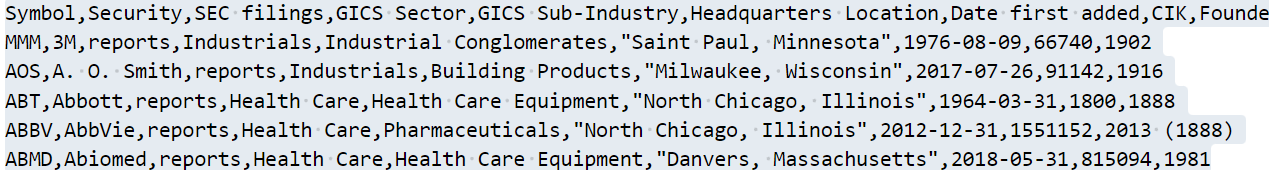

In [42]:
sp500 = DataFrame(load("sp500_list_07_29_2022.csv"));
# sp500 = CSV.read("sp500_list_07_29_2022.csv", DataFrame);
# sp500 = DataFrame(load("sp500_companies.csv"));

Row,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
,String,String,String,String,String,String,String,Int64,String
1,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
2,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
3,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
4,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
5,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
6,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
7,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
8,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
9,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982


In [43]:
names(sp500)

9-element Vector{String}:
 "Symbol"
 "Security"
 "SEC filings"
 "GICS Sector"
 "GICS Sub-Industry"
 "Headquarters Location"
 "Date first added"
 "CIK"
 "Founded"

In [44]:
nrow(sp500), size(sp500)

(503, (503, 9))

### Read `sp500_index.csv` using `FileIO`

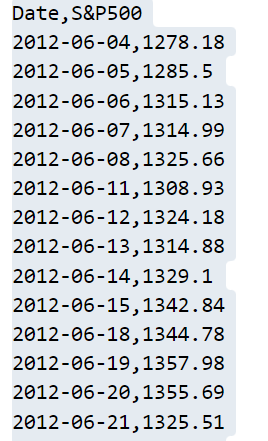

In [45]:
sp500_index = DataFrame(load("sp500_index.csv"));

In [46]:
names(sp500_index)

2-element Vector{String}:
 "Date"
 "S&P500"

In [47]:
index = sp500_index[:, "S&P500"];

In [48]:
typeof(index), length(index)

(Vector{Float64}, 2516)

In [49]:
using Statistics

In [50]:
mean(index)

2596.8279531001594

In [51]:
mean(sp500_index[:,"S&P500"])

2596.8279531001594